In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.DataFrame(pd.read_csv('train.csv'))
test_data =  pd.DataFrame(pd.read_csv('test.csv'))

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [5]:
train_data.shape

(7613, 5)

In [6]:
test_data.shape

(3263, 4)

In [7]:
train_data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
test_data.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [9]:
train_data.duplicated().sum()

0

In [10]:
test_data.duplicated().sum()

0

In [11]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# visualization

In [13]:
disaster_tw = train_data[train_data['target'] == 1]['text']
non_disaster_tw = train_data[train_data['target'] == 0]['text']

disaster_tw_wc = WordCloud().generate(disaster_tw.to_string())
non_disaster_tw_wc = WordCloud().generate(non_disaster_tw.to_string())

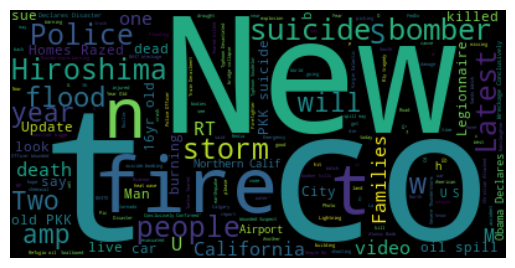

In [14]:
plt.imshow(disaster_tw_wc, interpolation ='bilinear')
plt.axis("off")
plt.show()

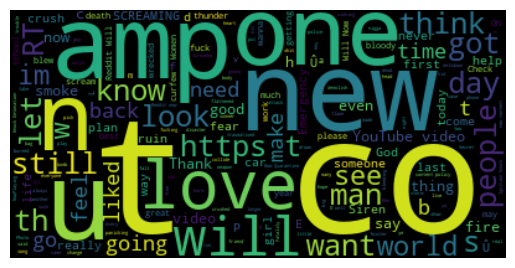

In [15]:
plt.imshow(non_disaster_tw_wc, interpolation ='bilinear')
plt.axis("off")
plt.show()

# Preprocessing 

In [16]:
train_data['text']=train_data['text'].map(lambda row: row.lower())
train_data['text']=train_data['text'].map(lambda row: row.lower())

In [17]:
#removing stop words
stop_words = stopwords.words('english')
train_data['text'] = train_data['text'].map(lambda row: ' '.join([word for word in row.split() if word.lower() not in stop_words]))
test_data['text'] = test_data['text'].map(lambda row: ' '.join([word for word in row.split() if word.lower() not in stop_words]))

In [18]:
#removing extensions, prefixes, suffixes
ps = PorterStemmer()
train_data['text'] = train_data['text'].map(lambda row: ' '.join([ps.stem(word) for word in row.split()]))
test_data['text'] = test_data['text'].map(lambda row: ' '.join([ps.stem(word) for word in row.split()]))

In [19]:
#removing punctuation , numbers or special charachter
train_data['text'] = train_data['text'].map(lambda row: re.sub(r'[^A-Za-z\s]', '', row))
test_data['text'] = test_data['text'].map(lambda row: re.sub(r'[^A-Za-z\s]', '', row))

In [20]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi officers evacu ...,1
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1


In [21]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,happen terribl car crash
1,2,NaN,NaN,heard earthquak differ cities stay safe everyone
2,3,NaN,NaN,forest fire spot pond gees flee across street ...
3,9,NaN,NaN,apocalyps lighting spokan wildfir
4,11,NaN,NaN,typhoon soudelor kill china taiwan


In [22]:
#applying lemmatization
lemma = WordNetLemmatizer()
train_data['text'] = train_data['text'].map(lambda row: ' '.join([lemma.lemmatize(word) for word in row.split()]))
test_data['text'] = test_data['text'].map(lambda row: ' '.join([lemma.lemmatize(word) for word in row.split()]))

# ML Model

In [23]:
X = train_data['text']
Y = train_data['target']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [24]:
tf = TfidfVectorizer()
x_train_tf = tf.fit_transform(x_train).toarray()
x_test_tf = tf.transform(x_test).toarray()

test_data_tf = tf.transform(test_data['text']).toarray()

In [25]:
data_tf = pd.DataFrame(x_train_tf, columns=tf.get_feature_names_out())
data_tf

,aa,aaaa,aaaaaaallll,aaarrrgghhh,aaceorg,aal,aampb,aampw,aan,aannnnd,...,zmne,zojadelin,zombi,zombiefunrun,zone,zonesthank,zonewolf,zouma,zumiez,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
model = LogisticRegression()
model.fit(x_train_tf,y_train)
y_pred = model.predict(x_test_tf)
acc = accuracy_score(y_test, y_pred)
acc

0.7944845699277742

In [28]:
id=test_data['id'].copy()
test_pred = model.predict(test_data_tf)
Final = pd.DataFrame({'id': id, 'target': test_pred})
Final

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1
